In [80]:
# 패션 MNIST - 훈련세트, 테스트 세트 
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [81]:
# 모델 생성 함수 - 층 추가가 가능 
def model_fn(a_layer = None):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(28,28))) # 입력층
    model.add(keras.layers.Flatten()) 
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

In [82]:
# model = model_fn()
model = model_fn(keras.layers.Dropout(0.3)) # 30% 비율의 밀집층의 출력을 0으로 랜덤하게 변경 
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [83]:
train_scaled = train_input / 255
test_scaled = test_input / 255

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# history = model.fit(train_scaled, train_target, epochs=20, validation_data=(test_scaled, test_target)) # history 객체 - 정확도, 손실률에 대한 각 에포크별 측정 데이터
# 13 에포크 이후 과대 적합 - 13 에포크가 최적 지점 
history = model.fit(train_scaled, train_target, epochs=13, validation_data=(test_scaled, test_target))

Epoch 1/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7359 - loss: 0.7573 - val_accuracy: 0.8426 - val_loss: 0.4388
Epoch 2/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8430 - loss: 0.4377 - val_accuracy: 0.8601 - val_loss: 0.3909
Epoch 3/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8560 - loss: 0.3988 - val_accuracy: 0.8583 - val_loss: 0.3920
Epoch 4/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8628 - loss: 0.3807 - val_accuracy: 0.8605 - val_loss: 0.3819
Epoch 5/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8672 - loss: 0.3642 - val_accuracy: 0.8626 - val_loss: 0.3799
Epoch 6/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8711 - loss: 0.3479 - val_accuracy: 0.8728 - val_loss: 0.3575
Epoch 7/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8745 - loss: 0.3438 - val_accuracy: 0.8703 - val_loss: 0.3658
Epoch 8/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8780 - loss: 0.3339 - 

In [84]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


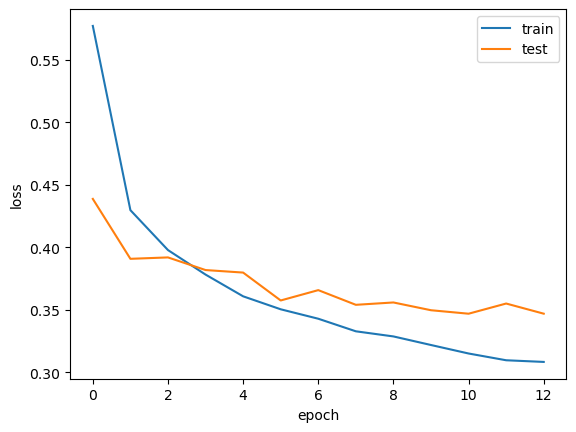

In [85]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss']) # 학습 세트 손실률 
plt.plot(history.history['val_loss']) # 테스트 세트 손실률 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.show()

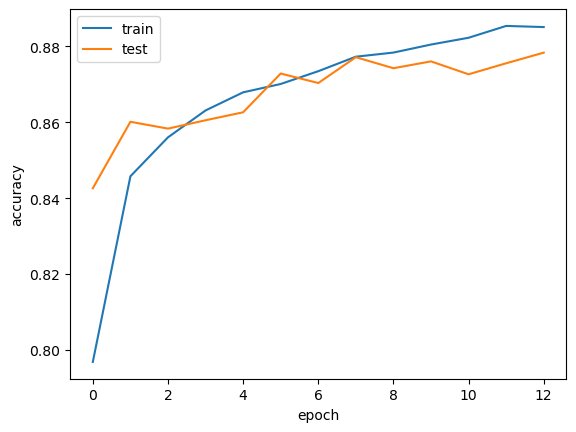

In [86]:
plt.plot(history.history['accuracy']) # 학습 세트 정확도 
plt.plot(history.history['val_accuracy']) # 테스트 세트 정확도 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.show()

In [87]:
# 1. 가중치만 저장, 2. 모델 전체 저장 
# model.save_weights("model.weights.h5")  # h5 - HDFS  - 가중치만 저장, 저장해준 모델과 동일한 구성 후 로드

In [88]:
# model = model_fn(keras.layers.Dropout(0.3))

In [89]:
# model.load_weights("model.weights.h5")  # 앞서 학습한 13에포크 가중치를 로드

In [90]:
# predictions = model.predict(test_scaled)

In [91]:
# import numpy as np
# np.mean(test_target == predictions.argmax(axis=1)) # 정답 1, 오답 0, 

In [92]:
# 2. 모델 전체 저장 
model.save("model-whole.keras")

In [93]:
# 저장된 모델 로드 
model = keras.models.load_model("model-whole.keras")

In [95]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8773 - loss: 0.3415  


[0.34694433212280273, 0.8783000111579895]